In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("house_price.csv")

In [3]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Q1. Perform basic EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [5]:
df.shape

(13200, 7)

In [6]:
#checking null  

df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [7]:
#statistical reprasentation of data
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [8]:
#uniqueness of data 
df.nunique()

location           241
size                31
total_sqft        1972
bath                19
price             1952
bhk                 19
price_per_sqft    4951
dtype: int64

<Axes: ylabel='price_per_sqft'>

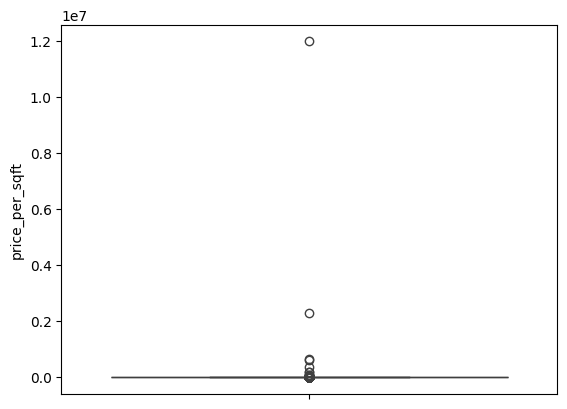

In [9]:
sns.boxplot(df['price_per_sqft'])

### 1* there is no null values in data set , no need to clean the dataset
 ### 2*      we can see that there is a difference in  mean and median of  column 'price_per_sqft' , signifying the presence of outliers.need to handle outliers
 ###  3*       boxplot to visualises the prasence outliers


# 2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)


#### method 1
a) Mean and Standard deviation

<Axes: >

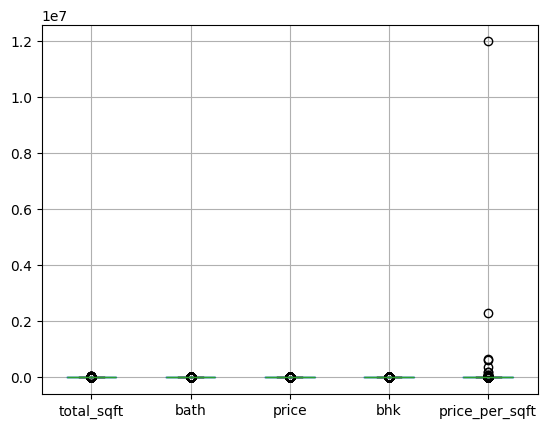

In [10]:
df.boxplot()

In [11]:
df.select_dtypes( include  = ['number']). skew()

total_sqft         15.388820
bath                4.249636
price               8.100191
bhk                 4.867343
price_per_sqft    108.281055
dtype: float64

In [12]:
mean_price_per_sqft=df['price_per_sqft'].mean()
mean_price_per_sqft

np.float64(7920.336742424242)

In [13]:
std_price_per_sqft=df.price_per_sqft.std()
std_price_per_sqft

np.float64(106727.16032810867)

In [14]:
upper_limit=mean_price_per_sqft + 3*std_price_per_sqft
lower_limit=mean_price_per_sqft - 3*std_price_per_sqft
print('upper limit =', upper_limit)
print('lower_limit =', lower_limit)

upper limit = 328101.8177267502
lower_limit = -312261.14424190175


In [15]:
df_cleaned_mean_std= df[(df['price_per_sqft'] > lower_limit)  & (df['price_per_sqft'] <upper_limit)]

In [16]:
df.shape

(13200, 7)

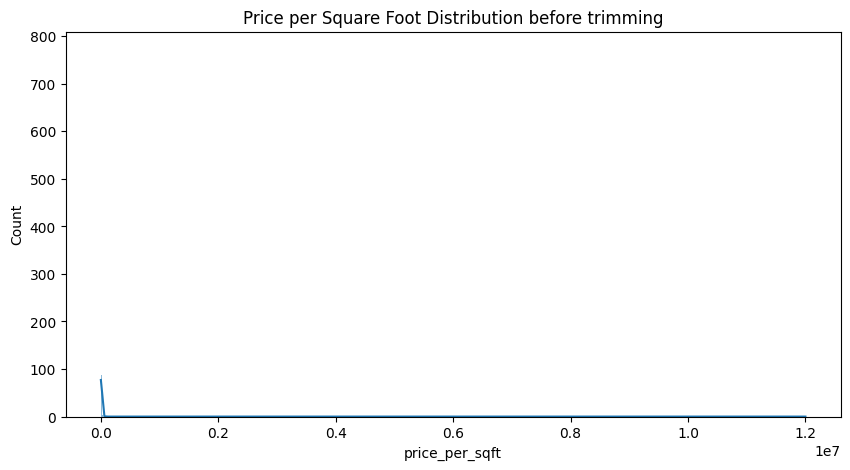

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution before trimming')
plt.show()

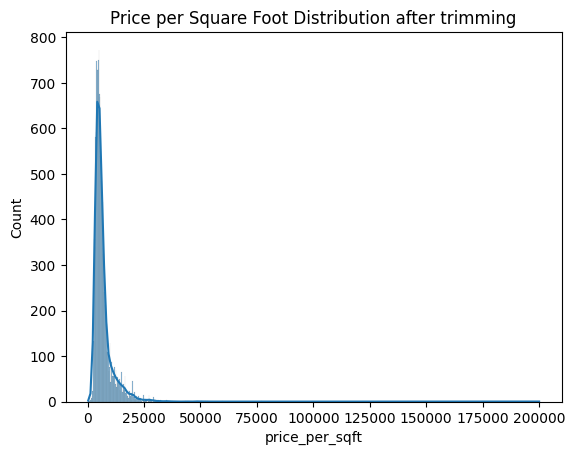

In [18]:
sns.histplot(df_cleaned_mean_std['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution after trimming')
plt.show()

b)Percentile method

In [19]:
lower_limit = df['price_per_sqft'].quantile(0.05)
upper_limit = df['price_per_sqft'].quantile(0.95)

outliers_percentile = df[(df['price_per_sqft'] <lower_limit) |  (df['price_per_sqft'] >upper_limit)]
df_cleaned_percentile = df[~df.index.isin(outliers_percentile.index)]

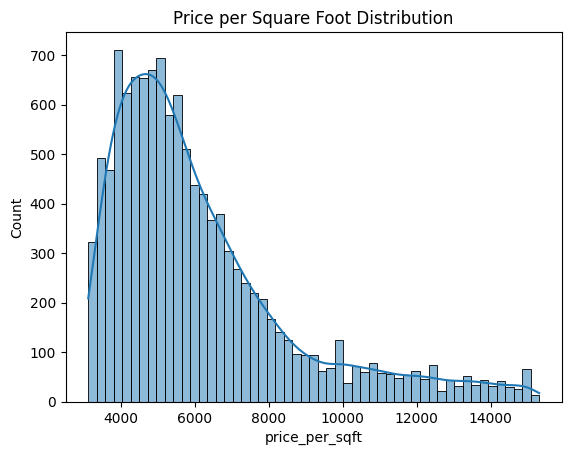

In [20]:
sns.histplot(df_cleaned_percentile ['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

c) IQR Method

In [21]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = df[(df['price_per_sqft'] <(Q1 - 1.5 * IQR)) | (df['price_per_sqft'] > (Q3 + 1.5 * IQR))]
df_cleaned_IQR = df[~df.index.isin(outliers_IQR.index)]

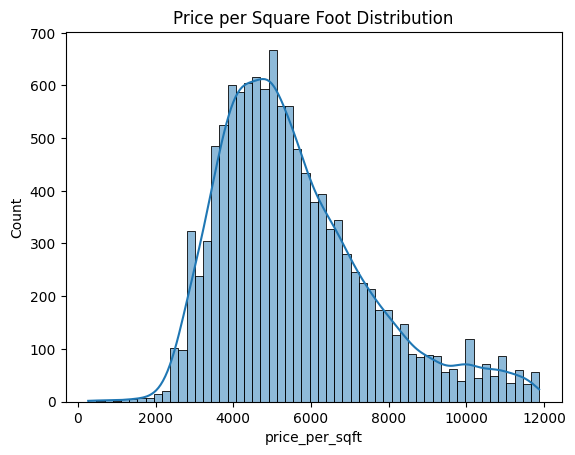

In [22]:
sns.histplot(df_cleaned_IQR ['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

d) Z-Score Method

In [23]:
z_scores = stats.zscore(df['price_per_sqft'])
outliers_z_score = df[(z_scores < -3) | (z_scores > 3)]
df_cleaned_zscore = df[~df.index.isin(outliers_z_score.index)]

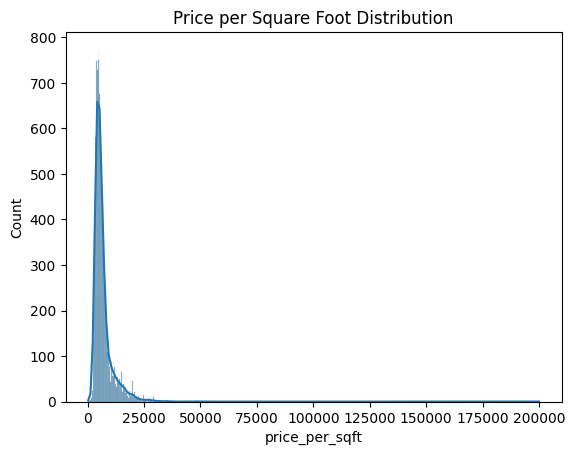

In [24]:
sns.histplot(df_cleaned_zscore ['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

#### * IQR method and percentile trimming proved to be effective in handling outliers

## 3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? 

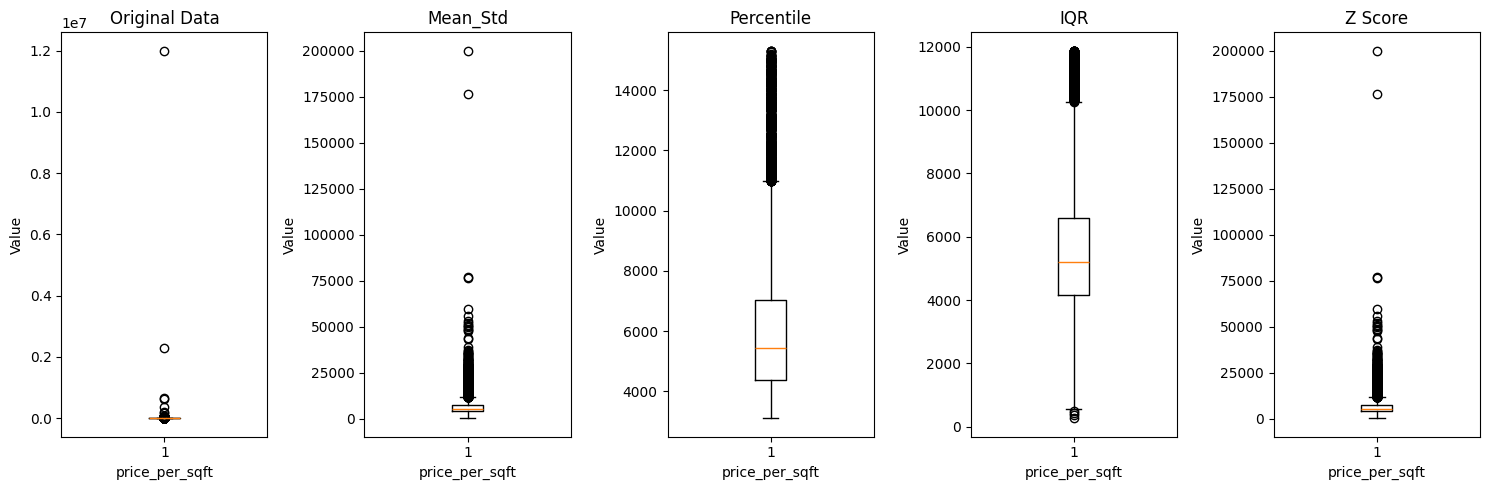

In [25]:
# Creates subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
# Plots Boxplot for Data 1
axs[0].boxplot(df['price_per_sqft'])
axs[0].set_title('Original Data')
axs[0].set_xlabel('price_per_sqft')
axs[0].set_ylabel('Value')
# Plots Boxplot for Data 2
axs[1].boxplot(df_cleaned_mean_std['price_per_sqft'])
axs[1].set_title('Mean_Std')
axs[1].set_xlabel('price_per_sqft')
axs[1].set_ylabel('Value')
# Plots Boxplot for Data 3
axs[2].boxplot(df_cleaned_percentile['price_per_sqft'])
axs[2].set_title('Percentile')
axs[2].set_xlabel('price_per_sqft')
axs[2].set_ylabel('Value')
# Plots Boxplot for Data 4
axs[3].boxplot(df_cleaned_IQR['price_per_sqft'])
axs[3].set_title('IQR')
axs[3].set_xlabel('price_per_sqft')
axs[3].set_ylabel('Value')
# Plots Boxplot for Data 5
axs[4].boxplot(df_cleaned_zscore['price_per_sqft'])
axs[4].set_title('Z Score')
axs[4].set_xlabel('price_per_sqft')
axs[4].set_ylabel('Value')
# Adjusts layout
plt.tight_layout()
plt.show()

# 4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation

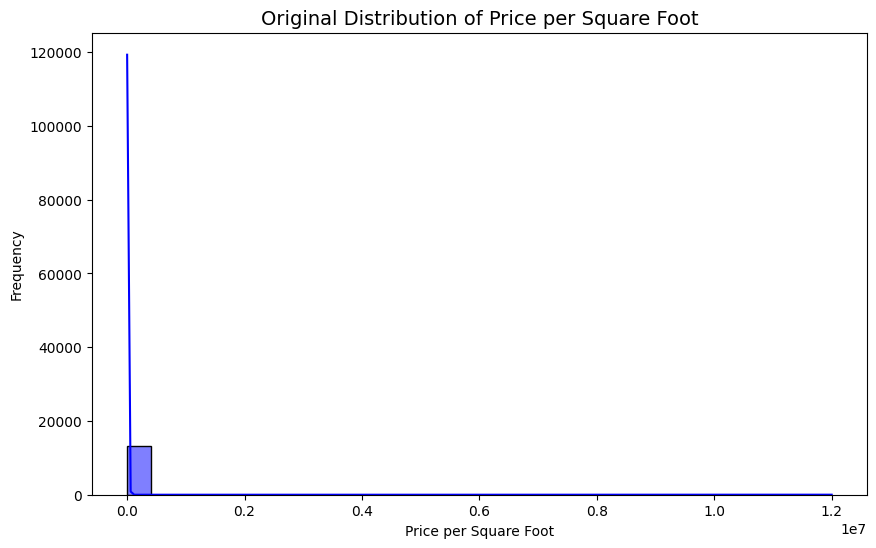

In [26]:
# Assuming df_cleaned_IQR is the cleaned dataframe
# Step 1: Draw histplot for original data
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price_per_sqft', bins=30, kde=True, color='blue')
plt.title('Original Distribution of Price per Square Foot', fontsize=14)
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

Skewness before: 108.28105529705168
Skewness after: 1.3998626551353
Kurtosis before: 12095.21502832288
Kurtosis after: 9.203576429862675


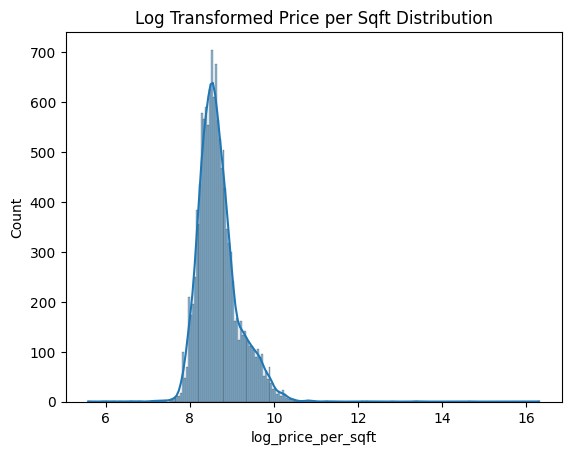

In [27]:
# Log Transformation
df['log_price_per_sqft'] = np.log(df['price_per_sqft'])

# Check skewness and kurtosis before and after transformation

print("Skewness before:", df['price_per_sqft'].skew())
print("Skewness after:", df['log_price_per_sqft'].skew())
print("Kurtosis before:", df['price_per_sqft'].kurtosis())
print("Kurtosis after:", df['log_price_per_sqft'].kurtosis())

# Histplot after transformation
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Log Transformed Price per Sqft Distribution')
plt.show()

## 5. Check the correlation between all the numerical columns and plot heatmap

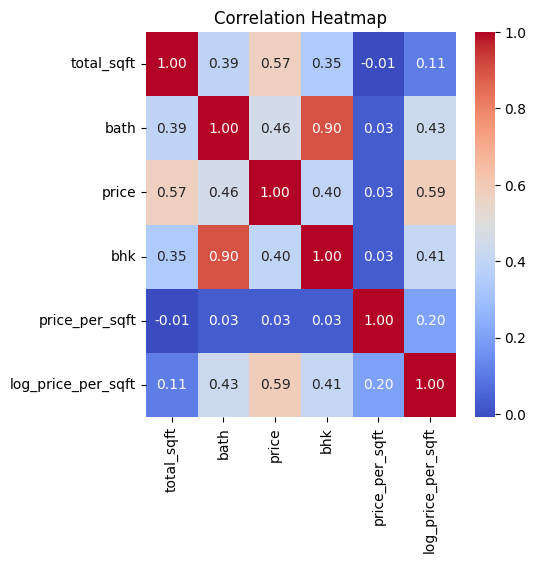

In [28]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

####  price_per_sqft showed strong positive correlations with total_sqft and the number of bedrooms

## 6. Draw Scatter plot between the variables to check the correlation between them.

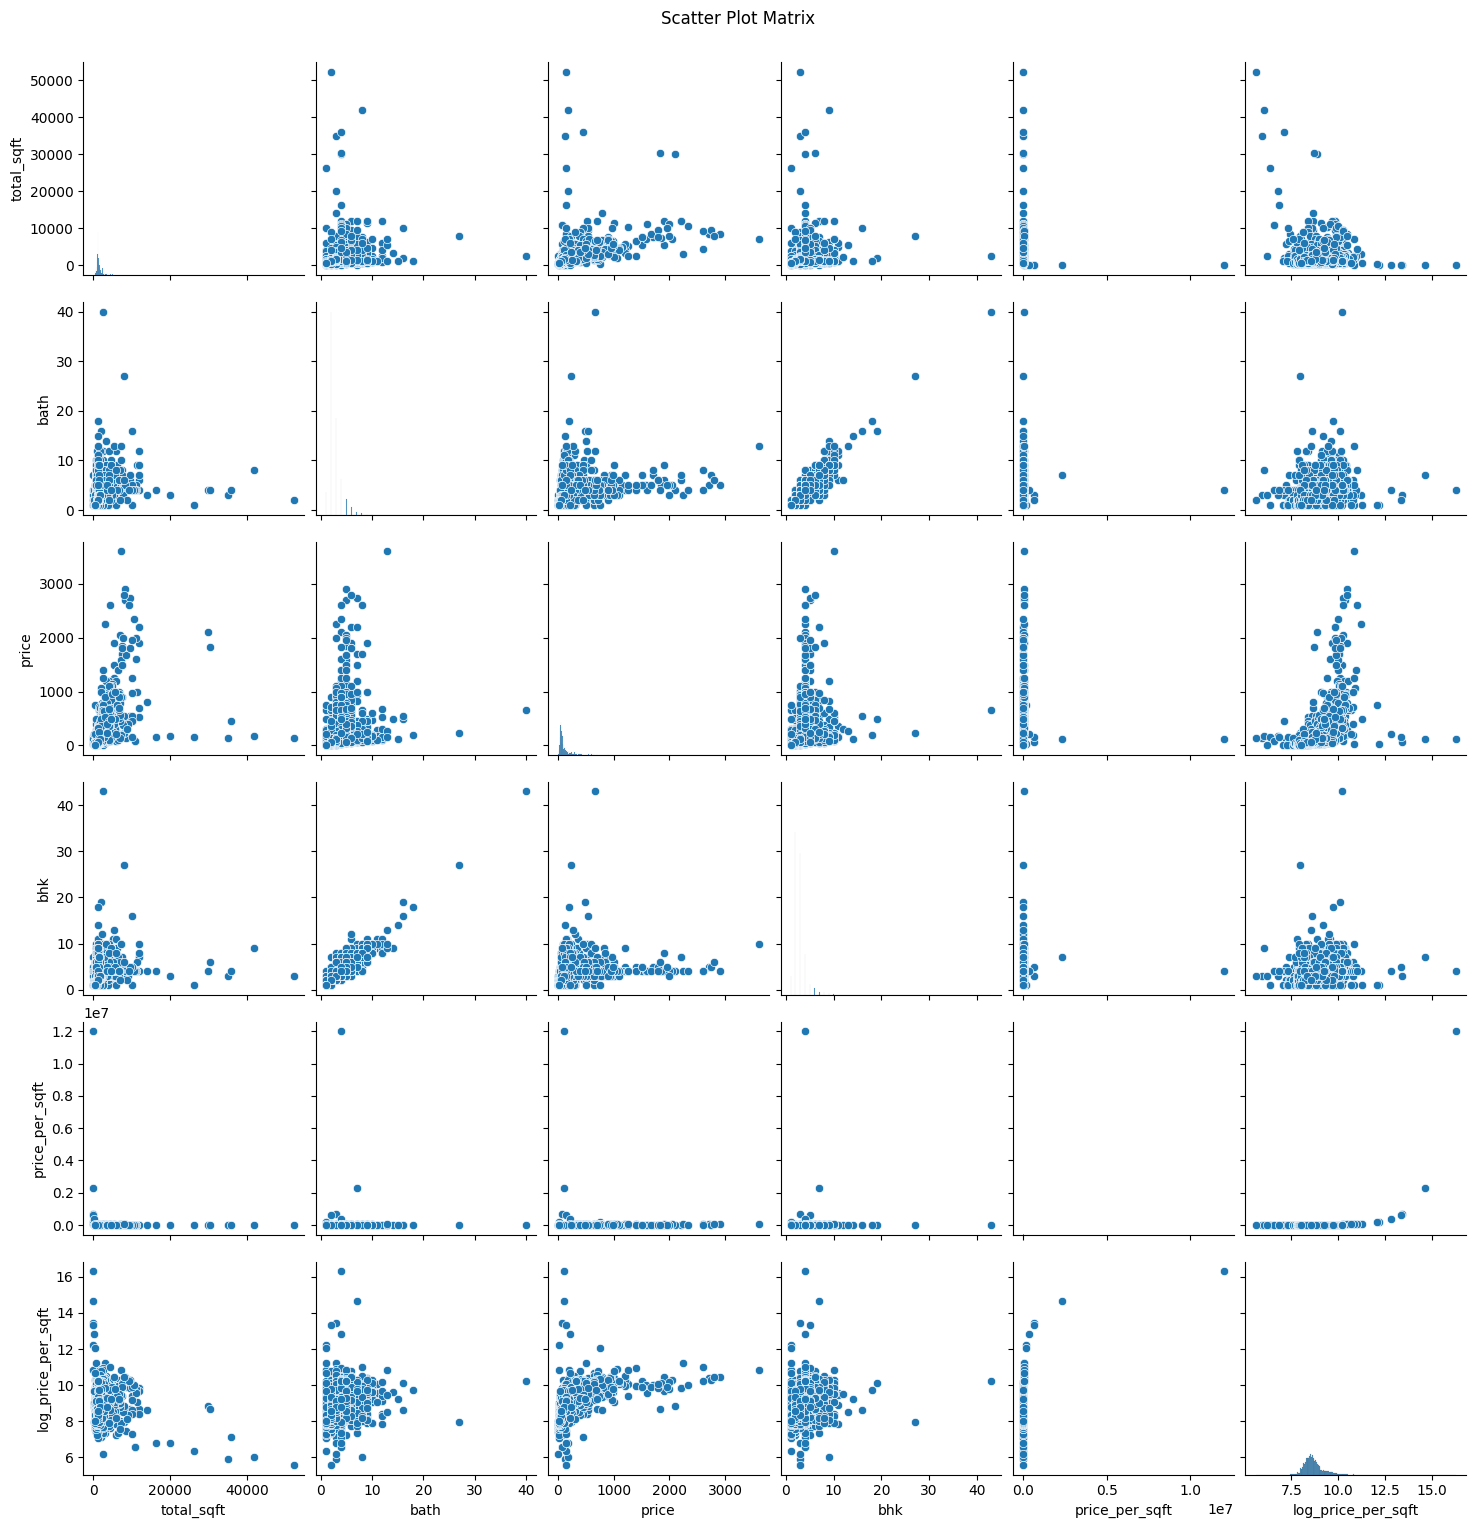

In [29]:
# Create a pairplot for the numerical columns
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix', y=1.02)  # Adjust y for spacing
plt.show()

### conclusion

### The analysis of the Bangalore house price dataset provides valuable insights into the factors influencing property prices in the region. Strong positive correlations were found between key features such as total_sqft, the number of bedrooms (bhk), and price_per_sqft, indicating that larger properties with more bedrooms tend to command higher prices. Effective outlier detection methods, including the Interquartile Range (IQR) and Z-Score approaches, helped filter extreme values, leading to a more reliable dataset for analysis. Visual tools like scatter plots and pairplots revealed important trends, clusters, and distributions that enhance understanding of property price determinants. These findings highlight the significance of size and functionality in pricing strategies and can guide buyers, sellers, and real estate professionals in making informed decisions. Future analyses could explore more advanced predictive modeling techniques and consider external factors such as location and amenities to gain a comprehensive view of the market. Overall, this analysis equips stakeholders with critical knowledge about the dynamics of the Bangalore real estate market, aiding them in navigating its complexities.¶